# STRF Estimation.  

**This notebooks tests python implementation of strf direct fit _strfpy_**




In [14]:
# Ignore Warnings
from warnings import simplefilter
simplefilter('ignore')

%reload_ext autoreload
%autoreload 2

In [15]:
# Dependencies - General Stuff
import sys
import os
import numpy as np
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
from glob import glob

# Depednecies from Theunissen Lab
# sys.path.append("/Users/frederictheunissen/Code/soundsig/")
from soundsig.sound import BioSound

# strfpy
sys.path.append("/Users/frederictheunissen/Code/crcns-kailin/module")
from strfpy.makePSTH import SpikeResponse
from strfpy import findDatasets, preprocSound, strfSetup, trnDirectFit, plotTfrep
# from strflab import preprocess_sound, srdata2strflab, linInit, strfData, trnDirectFit, strfOpt


# %matplotlib widget
plt.ion();

Set up the path

In [16]:
# Change this if you move around files
# path_base = os.path.join('/mnt/Data/kailin/crcns')
path_base = os.path.join('/Users/frederictheunissen/Code/crcns-kailin')

# For example you can specify an entire path
# path_base = '/Users/frederictheunissen/Documents/Classes/Summer Course/2016/theunissen_tutorials'

data_files = glob(os.path.join(path_base, 'data', '*', '*', '*'))
# spikes = glob('../data/*/*/*')

dataDir = os.path.join(path_base, 'data')  # contains stim/response pairs
stimsDir = os.path.join(dataDir, 'all_stims')  # contains the .wav files


In [17]:
# Thest matlab path are probably not needed

rootDir = os.path.join(path_base, 'matlab')
spath = os.path.join(rootDir, 'strflab')
dfpath = os.path.join(rootDir, 'direct_fit')
vpath = os.path.join(rootDir, 'validation')
ppath = os.path.join(rootDir, 'preprocessing')

# strflab.util.addpath(spath)
# strflab.util.addpath(dfpath)
# strflab.util.addpath(vpath)
# strflab.util.addpath(ppath)


load and visualize single unit data from Theunissen lab

In [18]:
# Specify the directory for three brain regions and three example neurons in each
cellDirName = 'l2a_avg'
cellDir = os.path.join(dataDir, cellDirName, 'conspecific')



In [19]:
# Get the stimulus and response files from the cell directory
datasets = findDatasets.find_datasets(cellDir, stimsDir)
cellStimDir = datasets['dirname']
stimFiles = datasets['srPairs']['stimFiles']  # paths to .wav files
respFiles = datasets['srPairs']['respFiles']  # paths to spike* files

In [21]:
# Preprocess the sound stimuli by taking the short time Fourier transform, and preprocess the raw spike
# times into PSTHs for each stim/response pair.
preprocDir = os.path.join(cellStimDir, 'preproc') # cache the preprocessed data here
os.makedirs(preprocDir, exist_ok=True)
preprocOptions = {} # we'll leave this empty and use default options


In [23]:
# set up datasets

srData = preprocSound.preprocess_sound(stimFiles, respFiles, preprocess_type='ft', stim_params = preprocOptions, output_dir = preprocDir)


pairCount = len(srData['datasets']) # number of stim/response pairs
nStimChannels = srData['nStimChannels']
strfLength = 75
strfDelays = np.arange(strfLength)

set up strflab

In [24]:
# Initialize the linear model
modelParams = strfSetup.linInit(nStimChannels, strfDelays)

modelParams

{'type': 'lin',
 'nIn': 61,
 'nWts': 4576,
 'delays': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]),
 'w1': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'b1': 0,
 'outputNL': 'linear',
 'freqDomain': 0,
 'internal': {'compFwd': 1,
  'prevResp': None,
  'prevLinResp': None,
  'dataHash': nan}}

### Starting srtflab calculations. 
To start fresh start (but without recalculating spectrograms) you need to start here and also delete the df_temp_resp and df_temp_stim created in the temp directory

In [96]:
global globDat   # Not sure why we need to have a global data ... something to check.

# Convert srData into a format that strflab understands
allstim, allresp, groupIndex = strfSetup.srdata2strflab(srData, 0)
globDat = strfSetup.strfData(allstim, allresp, groupIndex)


In [97]:
# Create default optimization options structure
params, optOptions = trnDirectFit.trnDirectFit()
optOptions['display'] = 1


In [133]:
# Run direct fit optimization on all of the data
datIdx = np.arange(len(allresp)) # the indexes of training data (all of it)
modelParamsTrained, options = strfSetup.strfOpt(modelParams, datIdx, optOptions, globDat)

Now calculating stim autocorrelation
Done auto-correlation calculation
The autocorrelation took 75.57275200000004 seconds.
Now doing cross-correlation calculation.
Done calculation of cross-correlation.
Now calculating JN cross-correlation.
Done calculation of JN cross-correlation.
Calculating strfs for each tol value.
Done df_fft_AutoCrossCorr.
Calculating STRF for each tol value...
Now calculating STRF for tol_value: 0.1
Done calculation of STRF for tol_value: 0.1

Now calculating STRF for tol_value: 0.05
Done calculation of STRF for tol_value: 0.05

Now calculating STRF for tol_value: 0.01
Done calculation of STRF for tol_value: 0.01

Now calculating STRF for tol_value: 0.005
Done calculation of STRF for tol_value: 0.005

Now calculating STRF for tol_value: 0.001
Done calculation of STRF for tol_value: 0.001

Now calculating STRF for tol_value: 0.0005
Done calculation of STRF for tol_value: 0.0005

Now calculating STRF for tol_value: 0.0001
Done calculation of STRF for tol_value: 0.

Text(0.5, 1.0, 'Stimulus-Response Cross Correlation')

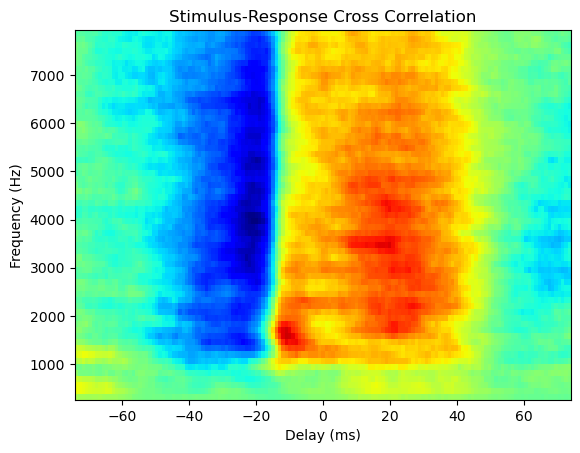

In [134]:
# display the stimulus response cross-correlation
plt.figure()

# Looks at first ds to examine frequencies
ds = srData['datasets'][0]
tfrep = ds['stim']['tfrep']
strfFrequencies = tfrep['f']

crossCorr = np.load(os.path.join(options['outputDir'], 'StimResp_crosscorr.npy'))

maxabs = np.max(np.abs(crossCorr))

plt.imshow(crossCorr, origin='lower', cmap = 'jet', aspect='auto',
           extent=[-strfDelays[-1], strfDelays[-1], strfFrequencies[0], strfFrequencies[-1]],
           vmin=-maxabs,
           vmax=maxabs)

plt.xlabel('Delay (ms)')
plt.ylabel('Frequency (Hz)')
plt.title('Stimulus-Response Cross Correlation')

Text(0.5, 1.0, 'Stimulus Auto Correlation for band 0')

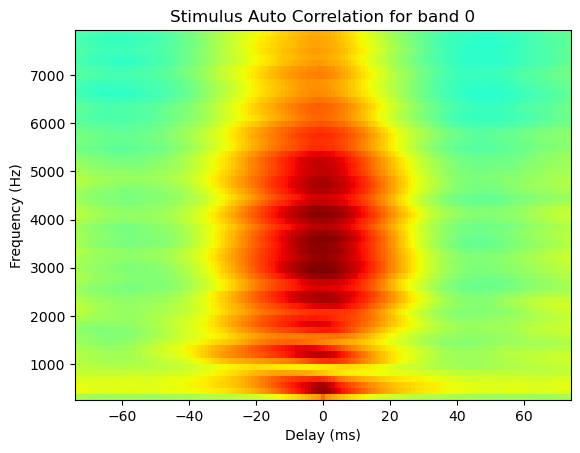

In [135]:
# display the stimulus auto-correlation
plt.figure()

# Looks at first ds to examine frequencies
ds = srData['datasets'][0]
tfrep = ds['stim']['tfrep']
strfFrequencies = tfrep['f']
nbands = modelParams['nIn']

autoCorr = np.load(os.path.join(options['outputDir'], 'Stim_autocorr.npy'))

maxabs = np.max(np.abs(autoCorr[0:nbands,:]))


plt.imshow(autoCorr[0:nbands,:], origin='lower', cmap = 'jet', aspect='auto',
           extent=[-strfDelays[-1], strfDelays[-1], strfFrequencies[0], strfFrequencies[-1]],
           vmin=-maxabs,
           vmax=maxabs)

plt.xlabel('Delay (ms)')
plt.ylabel('Frequency (Hz)')
plt.title('Stimulus Auto Correlation for band 0')

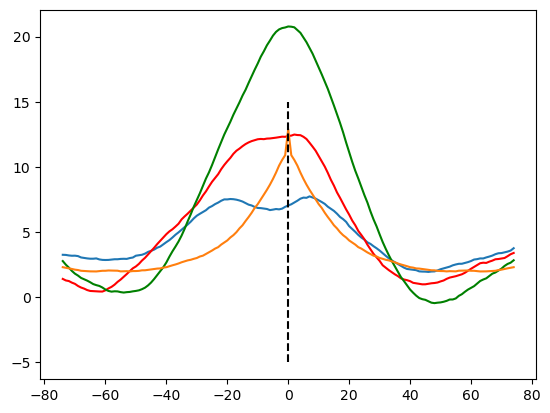

In [131]:
# The stimulus auto-correlations looks ok.

# display the stimulus auto-correlation
plt.figure()

# Looks at first ds to examine frequencies


plt.plot(np.arange(-strfDelays[-1],strfDelays[-1]+1), autoCorr[5,:])
plt.plot(np.arange(-strfDelays[-1],strfDelays[-1]+1), autoCorr[10,:], 'r')
plt.plot(np.arange(-strfDelays[-1],strfDelays[-1]+1), autoCorr[20,:], 'g')
plt.plot(np.arange(-strfDelays[-1],strfDelays[-1]+1), autoCorr[0,:])

plt.plot([0, 0], [-5, 15], 'k--')

Text(0.5, 1.0, 'Best STRF')

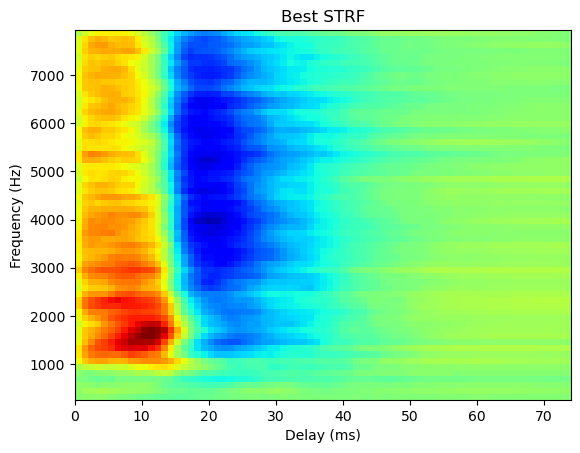

In [136]:
# display the best STRF
plt.figure()

# Looks at first ds to examine frequencies
ds = srData['datasets'][0]
tfrep = ds['stim']['tfrep']
strfFrequencies = tfrep['f']

mySTRF = np.real(modelParamsTrained['w1'])
maxabs = np.max(np.abs(mySTRF))

plt.imshow( mySTRF, origin='lower', cmap = 'jet', aspect='auto',
           extent=[strfDelays[0], strfDelays[-1], strfFrequencies[0], strfFrequencies[-1]],
           vmin=-maxabs,
           vmax=maxabs)

plt.xlabel('Delay (ms)')
plt.ylabel('Frequency (Hz)')
plt.title('Best STRF')

compute prediction for each stim/response pair and concatenate them, <br>
also split the real PSTHs in half and concatenate them across pairs

In [ ]:
pairCount = len(srData['datasets'])
predictionSets = [None] * pairCount
concatPredResp = np.array([])
concatPsthHalf1 = np.array([])
concatPsthHalf2 = np.array([])

strfFrequencies = -1

In [ ]:
for k in range(pairCount):
    # get stim and response
    ds = srData['datasets'][k]
    tfrep = ds['stim']['tfrep']
    strfFrequencies = tfrep['f']


    strflabIndx = np.where(groupIndex == k)[0]
    stim = allstim[strflabIndx, :]
    resp = allresp[strflabIndx]

    # compute prediction
    modelParamsTemp, predResp = strfSetup.strfFwd(modelParamsTrained, strflabIndx, globDat)
    del modelParamsTemp

    # fix any NaNs in response
    predResp = predResp[0]
    predResp[np.isnan(predResp)] = 0


    # rectify response
    predResp[predResp < 0] = 0

    # scale predicted response
    predResp = (predResp / max(predResp)) * max(resp)

    # concatenate PSTH halves and predicted PSTH for this trial
    stimLengthMs = (stim.shape[0] / srData['stimSampleRate']) * 1e3
    psthdata = preprocSound.split_psth(ds['resp']['rawSpikeIndicies'], stimLengthMs)
    numTrials = len(ds['resp']['rawSpikeTimes'])

    concatPredResp = np.concatenate((concatPredResp, predResp))
    concatPsthHalf1 = np.concatenate((concatPsthHalf1, psthdata['psth_half1']))
    concatPsthHalf2 = np.concatenate((concatPsthHalf2, psthdata['psth_half2']))
    %matplotlib inline
    plt.figure()
    rsint = 1 / srData['respSampleRate']
    tresp = np.arange(len(resp)) * rsint
    tpresp = np.arange(len(predResp)) * rsint

    plt.subplot(2,1,1)
    plt.imshow(tfrep['spec'], aspect='auto', origin='lower'
           , extent=[tfrep['t'][0], tfrep['t'][-1], tfrep['f'][0], tfrep['f'][-1]])

    

    # plot response and prediction
    plt.subplot(2,1,2)
    plt.plot(tresp, resp, 'k-', linewidth=2)
    plt.plot(tpresp, predResp, 'r-', linewidth=1)
    plt.legend(['Real', 'Model'])
    plt.xlim([tresp[0], tresp[-1]])
    plt.xlabel('Time (s)')
    plt.ylabel('Response')
    plt.tight_layout()
    plt.show()

In [ ]:
modelParamsTrained['w1'].shape

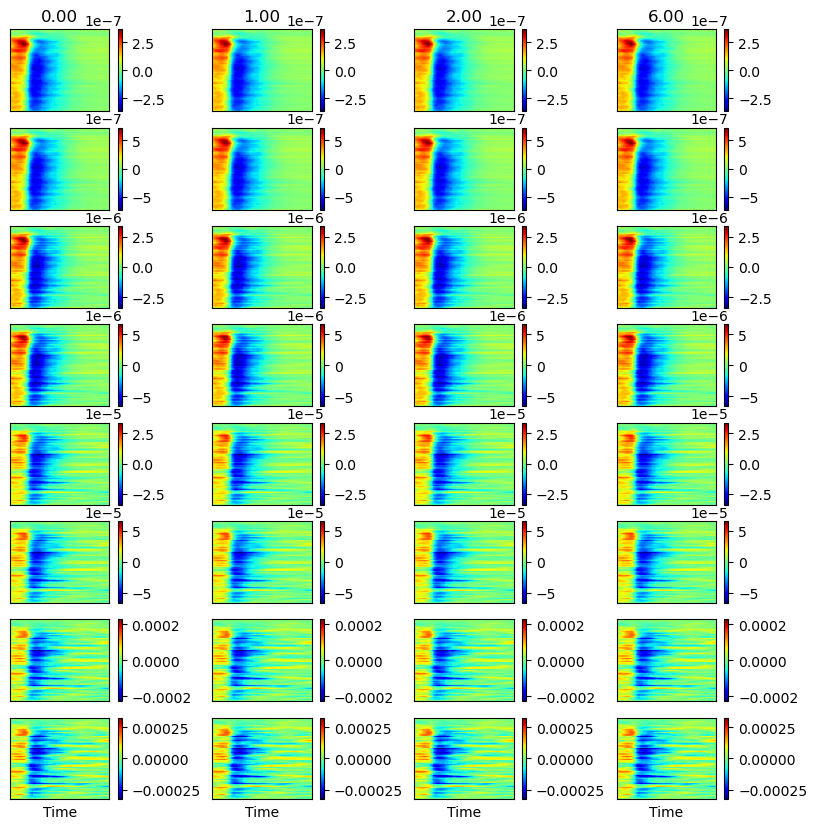

In [138]:
%matplotlib inline
# Create a list of file names for each tolerance
strfFiles = [os.path.join(options['outputDir'], f'strfResult_Tol{k}.npz') for k in range(1, len(options['tolerances']) + 1)]

# Choose the temporal section of the STRF that is used in the convolution
halfIndx = int(np.ceil(np.max(np.abs(modelParams['delays']))) + 1)  # This is the point corresponding to zero
startIndx = int(halfIndx + round(np.min(modelParams['delays'])))
endIndx = int(halfIndx + round(np.max(modelParams['delays'])))
# strfRng = np.arange(startIndx, endIndx)

fig, axs = plt.subplots(len(options['tolerances']), len(options['sparsenesses']), figsize=(10, 10))
maxall = np.zeros((len(options['tolerances']), len(options['sparsenesses'])))

for k in range(len(options['tolerances'])):

    svars = np.load(strfFiles[k], allow_pickle=True)
    strfsJN = svars['STRFJN_Cell']
    strfsJN_std = svars['STRFJNstd_Cell']
    strfMean = svars['STRF_Cell']
    strfStdMean = np.mean(strfsJN_std, axis=2)
    
    # Clear the variable to free up memory
    del svars
    
    for q in range(len(options['sparsenesses'])):
        ax = axs[k, q]
        
        smoothedMeanStrf = trnDirectFit.df_fast_filter_filter(strfMean, strfStdMean, options['sparsenesses'][q])
        # smoothedMeanStrf = strfMean

        im = ax.imshow(np.real(smoothedMeanStrf[:, startIndx:endIndx+1])
                       , cmap='jet'
                       , vmin=-np.max(np.abs(np.real(smoothedMeanStrf[:, startIndx:endIndx+1])))
                       , vmax=np.max(np.abs(np.real(smoothedMeanStrf[:, startIndx:endIndx+1])))
                      )
        maxall[k, q] = np.max(np.abs(np.real(smoothedMeanStrf[:, startIndx:endIndx+1])))
        
        fig.colorbar(im, ax=ax)
        # im.set_clim(-maxall[k, q], maxall[k, q])
        ax.set_xticks([])
        ax.set_yticks([])
        if k == 0:
            ax.set_title('%.2f' % options['sparsenesses'][q])
        if k == len(options['tolerances']) - 1:
            ax.set_xlabel('Time')

        

plt.show()


In [ ]:
import pickle 
pickle.dump(modelParams,open("/tmp/modelParams.pkl",'wb'))
pickle.dump(datIdx,open("/tmp/datIdx.pkl",'wb'))
pickle.dump(optOptions,open("/tmp/optOptions.pkl",'wb'))
pickle.dump(globDat,open("/tmp/globDat.pkl",'wb'))

In [ ]:
tmp_modelParams = pickle.load(open("/tmp/modelParams.pkl",'rb'))
tmp_datIdx = pickle.load(open("/tmp/datIdx.pkl",'rb'))
tmp_optOptions = pickle.load(open("/tmp/optOptions.pkl",'rb'))
tmp_globDat = pickle.load(open("/tmp/globDat.pkl",'rb'))

In [ ]:
globals()[optOptions['trnDirectFit.trnDirectFit']](modelParams, datIdx, optOptions, globDat, 1)


In [ ]:
trnDirectFit.trnDirectFit(modelParams, datIdx, optOptions, globDat, 1)